In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan.csv')
df.head()

C:\Users\fidel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df.shape

(39717, 111)

# data cleaning

## dealing with missing values

In [4]:
df.isnull().sum().sort_values(ascending=False).head(20)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
bc_open_to_buy               39717
avg_cur_bal                  39717
acc_open_past_24mths         39717
inq_last_12m                 39717
total_cu_tl                  39717
inq_fi                       39717
total_rev_hi_lim             39717
all_util                     39717
max_bal_bc                   39717
open_rv_24m                  39717
open_rv_12m                  39717
il_util                      39717
total_bal_il                 39717
mths_since_rcnt_il           39717
open_il_24m                  39717
dtype: int64

In [5]:
#drop all columns having all null values
df = df.dropna(axis=1,how='all')

In [6]:
#check columns with null values
df.isnull().sum().sort_values(ascending=False).head(15)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
dtype: int64

In [7]:
#next_pymnt_d is a date time column and its insufficient date and cannot be imputed
df = df.drop(labels=['next_pymnt_d'], axis=1)

In [8]:
#is mths_since_last_record imputable?

In [9]:
#is mths_since_last_delinq imputable?

In [10]:
#desc might be help if nlp is involved but for EDA, it isn't applicable to use this column
df = df.drop(labels=['desc'], axis=1)

In [11]:
df['emp_title'].value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

In [12]:
df = df[df['emp_title'].notna()]

In [13]:
df = df[df['emp_length'].notna()]

In [14]:
df = df[df['pub_rec_bankruptcies'].notna()]

In [15]:
df = df[df['last_pymnt_d'].notna()]

In [16]:
df = df[df['chargeoff_within_12_mths'].notna()]

In [17]:
df = df[df['collections_12_mths_ex_med'].notna()]

In [18]:
df = df[df['revol_util'].notna()]

In [19]:
df = df[df['tax_liens'].notna()]

In [20]:
df = df[df['title'].notna()]

In [21]:
df = df[df['last_credit_pull_d'].notna()]

In [22]:
df.shape
# 3,286 row entries removed
# 56 column entries removed

(36431, 55)

# exploratory data analysis proper

In [23]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### columns that are relevant regarding deliquency

1. loan_status
2. delinq_2yrs
3. mths_since_last_delinq
4. delinq_amnt (all zeros)
5. acc_now_delinq (all zeros)
6. mths_since_recent_bc_dlq (NANs)
7. mths_since_recent_revol_delinq (NANs)
8. verification_status

In [24]:
df['loan_status'].value_counts()

Fully Paid     30423
Charged Off     4942
Current         1066
Name: loan_status, dtype: int64

### people who defaulted

In [25]:
default = df[df['loan_status']=='Charged Off']
default.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,...,305.38,Nov-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
14,1069057,1303503,10000,10000,10000.0,36 months,10.65%,325.74,B,B2,...,325.74,Mar-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
21,1039153,1269083,21000,21000,21000.0,36 months,12.42%,701.73,B,B4,...,701.73,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [41]:
default.shape

(4942, 55)

### their loan profile

(array([ 736., 1010.,  879.,  613.,  538.,  461.,  196.,  273.,   85.,
         151.]),
 array([ 1000.,  4400.,  7800., 11200., 14600., 18000., 21400., 24800.,
        28200., 31600., 35000.]),
 <BarContainer object of 10 artists>)

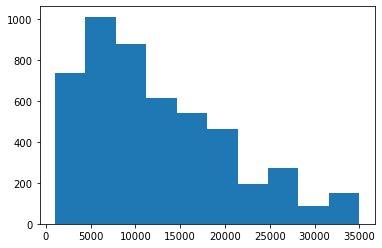

In [26]:
plt.hist(default['loan_amnt'])

<AxesSubplot:ylabel='term'>

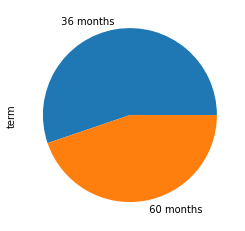

In [27]:
default['term'].value_counts().plot.pie()

(array([ 948., 1351., 1152.,  673.,  380.,  194.,  176.,   48.,   12.,
           8.]),
 array([  22.79,  151.03,  279.27,  407.51,  535.75,  663.99,  792.23,
         920.47, 1048.71, 1176.95, 1305.19]),
 <BarContainer object of 10 artists>)

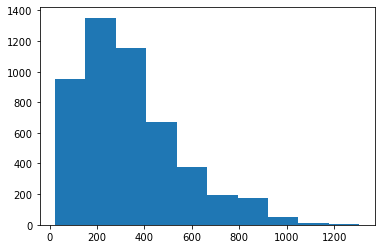

In [28]:
plt.hist(default['installment'])

### borrower's profile

In [29]:
#home_ownership


In [30]:
#annual_inc


In [31]:
#purpose


(array([ 516., 1182., 1170.,  912.,  531.,  368.,  173.,   47.,   41.,
           2.]),
 array([ 2. ,  8.8, 15.6, 22.4, 29.2, 36. , 42.8, 49.6, 56.4, 63.2, 70. ]),
 <BarContainer object of 10 artists>)

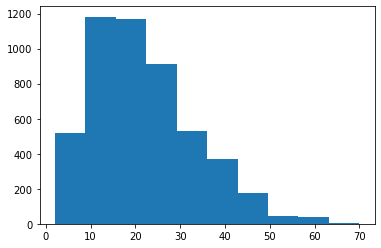

In [36]:
# borrowers' amount of credit lines
plt.hist(default['total_acc'])

In [ ]:
#loan balance = loan_amnt - total_pymnt

In [37]:
default['last_pymnt_amnt'].value_counts()

200.00    15
100.00    14
50.00     12
400.00    11
150.00    10
          ..
244.09     1
266.34     1
348.35     1
320.25     1
133.55     1
Name: last_pymnt_amnt, Length: 4128, dtype: int64

In [39]:
default['application_type'].value_counts()

INDIVIDUAL    4942
Name: application_type, dtype: int64

In [45]:
default['pub_rec_bankruptcies'].value_counts()

0.0    4630
1.0     310
2.0       2
Name: pub_rec_bankruptcies, dtype: int64

0.0    4942
Name: tax_liens, dtype: int64

## Bivariate analysis